# Derivative of Matrix

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

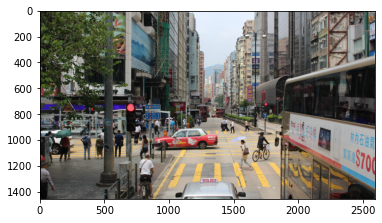

In [2]:
I = img.imread('C:/Users/이윤정/Desktop/2021_1/ML/03/yjhongkong_15.jpg')
plt.imshow(I)

## check the size of image

In [3]:
#n_row = len(I)
#n_col = len(I[0])
n_row = I.shape[0]
n_col = I.shape[1]
print(I)
print(I.shape)

[[[104 122  82]
  [113 128  89]
  [120 135  96]
  ...
  [102  92 101]
  [ 79  66  76]
  [ 59  47  59]]

 [[ 94 111  69]
  [107 125  83]
  [104 127  83]
  ...
  [ 98  91  98]
  [ 69  62  70]
  [ 55  48  56]]

 [[100 117  73]
  [101 122  79]
  [ 90 119  73]
  ...
  [ 98  91  98]
  [ 73  63  71]
  [ 62  55  62]]

 ...

 [[  8   8   8]
  [  7   7   7]
  [  6   6   6]
  ...
  [ 29  29  29]
  [ 29  29  29]
  [ 30  30  30]]

 [[  7   7   7]
  [  8   8   8]
  [  8   8   8]
  ...
  [ 29  29  29]
  [ 29  29  29]
  [ 30  30  30]]

 [[  6   6   6]
  [  8   8   8]
  [  7   7   7]
  ...
  [ 28  30  29]
  [ 28  30  29]
  [ 30  30  30]]]
(1456, 2592, 3)


## convert the input image into gray scale if it is color

In [4]:
if I.shape[2] == 3:
    I = I.mean(axis=2)
print(I)
print(I.shape)

[[102.66666667 110.         117.         ...  98.33333333  73.66666667
   55.        ]
 [ 91.33333333 105.         104.66666667 ...  95.66666667  67.
   53.        ]
 [ 96.66666667 100.66666667  94.         ...  95.66666667  69.
   59.66666667]
 ...
 [  8.           7.           6.         ...  29.          29.
   30.        ]
 [  7.           8.           8.         ...  29.          29.
   30.        ]
 [  6.           8.           7.         ...  29.          29.
   30.        ]]
(1456, 2592)


## normalize input image so that the range of image is $[0, 1]$

In [5]:
I = (I - I.min(axis=0)) / (I.max(axis=0) - I.min(axis=0))
print(I)
print(I.shape)

[[0.58974359 0.64717742 0.65067179 ... 0.42539683 0.30917874 0.22330097]
 [0.52268245 0.61693548 0.57965451 ... 0.41269841 0.27697262 0.21359223]
 [0.55424063 0.59072581 0.51823417 ... 0.41269841 0.28663446 0.24595469]
 ...
 [0.0295858  0.02419355 0.01151631 ... 0.0952381  0.09339775 0.10194175]
 [0.02366864 0.03024194 0.02303263 ... 0.0952381  0.09339775 0.10194175]
 [0.01775148 0.03024194 0.01727447 ... 0.0952381  0.09339775 0.10194175]]
(1456, 2592)


```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [6]:
# column의 미분
# n_row, n_col 위에 구해져 있음
#Dx = np.array([[0 for _ in range(n_row)]for __ in range(n_col)])
Dx = np.zeros((n_col, n_col))
for i in range(n_col):
    for j in range(n_col):
        if i==j:
            Dx[i][j] = -1            
            if i < n_col-1:
                Dx[i+1][j] = 1
print(Dx)
print(Dx.shape)

[[-1.  0.  0. ...  0.  0.  0.]
 [ 1. -1.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]]
(2592, 2592)


## compute the derivative of $I$ with respect to $x$-direction

In [7]:
# Dx와 I를 곱한 Ix가 I에 대한 미분이 되도록
#Ix = np.reshape(I,(n_row, n_col))*Dx
Ix = I@Dx
print(Ix)

[[ 0.05743383  0.00349437 -0.18848691 ... -0.11621808 -0.08587777
  -0.22330097]
 [ 0.09425304 -0.03728097 -0.16368812 ... -0.13572579 -0.06338039
  -0.21359223]
 [ 0.03648518 -0.07249164 -0.14428459 ... -0.12606395 -0.04067977
  -0.24595469]
 ...
 [-0.00539225 -0.01267723  0.00108873 ... -0.00184035  0.008544
  -0.10194175]
 [ 0.0065733  -0.00720931 -0.00622591 ... -0.00184035  0.008544
  -0.10194175]
 [ 0.01249046 -0.01296746 -0.00046775 ... -0.00184035  0.008544
  -0.10194175]]


```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [8]:
Dy = np.zeros((n_row, n_row))
for i in range(n_row):
    for j in range(n_row):
        if i==j:
            Dy[i][j] = -1
            if i<n_row-1:
                Dy[i][j+1] = 1
print(Dy)
print(Dy.shape)

[[-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  0.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]
(1456, 1456)


## compute the derivative of $I$ with respect to $y$-direction

In [9]:
Iy = Dy@I
print(Iy)

[[-0.06706114 -0.03024194 -0.07101727 ... -0.01269841 -0.03220612
  -0.00970874]
 [ 0.03155819 -0.02620968 -0.06142035 ...  0.          0.00966184
   0.03236246]
 [-0.01577909 -0.04233871 -0.06333973 ...  0.00634921  0.01610306
  -0.02588997]
 ...
 [-0.00591716  0.00604839  0.01151631 ...  0.          0.
   0.        ]
 [-0.00591716  0.         -0.00575816 ...  0.          0.
   0.        ]
 [-0.01775148 -0.03024194 -0.01727447 ... -0.0952381  -0.09339775
  -0.10194175]]


```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [10]:
norm_gradient = Ix**2 + Iy**2
print(norm_gradient)

[[7.79584182e-03 9.26785253e-04 4.05707689e-02 ... 1.36678921e-02
  8.41222602e-03 4.99575832e-02]
 [9.87955426e-03 2.07681816e-03 3.05662608e-02 ... 1.84214895e-02
  4.11042513e-03 4.66689708e-02]
 [1.58014778e-03 7.04760441e-03 2.48299631e-02 ... 1.59324325e-02
  1.91415205e-03 6.11640012e-02]
 ...
 [6.40891444e-05 1.97295238e-04 1.33810833e-04 ... 3.38688689e-06
  7.29999702e-05 1.03921199e-02]
 [7.82210056e-05 5.19740919e-05 7.19182929e-05 ... 3.38688689e-06
  7.29999702e-05 1.03921199e-02]
 [4.71126513e-04 1.08272977e-03 2.98626178e-04 ... 9.07368167e-03
  8.79613885e-03 2.07842398e-02]]


## define functions for the visualization

In [11]:
# imshow : option으로 log scale 설정해서 이미지 출력해야함
print(I.shape)

def plot_image(I):
    
    plt.figure(figsize=(10,10))
    #plt.imshow( , , )
    plt.imshow(I, norm=colors.LogNorm())
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    
    plt.figure(figsize=(10,10))
    #plt.imshow(Ix)
    plt.imshow(Ix, norm=colors.LogNorm())
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Iy, norm=colors.LogNorm())
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient, norm=colors.LogNorm())
    plt.title('norm gradient')
    plt.axis('off')

(1456, 2592)


```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

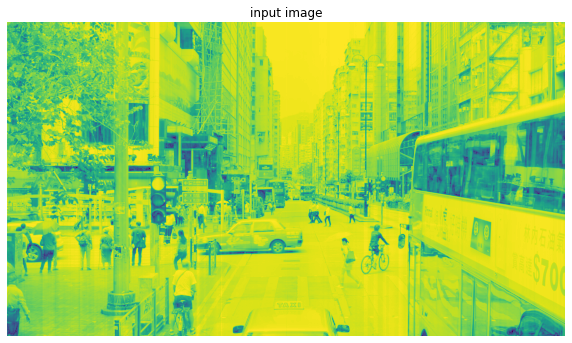

In [12]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

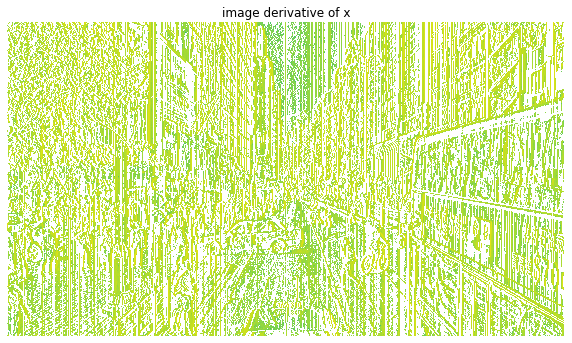

In [13]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

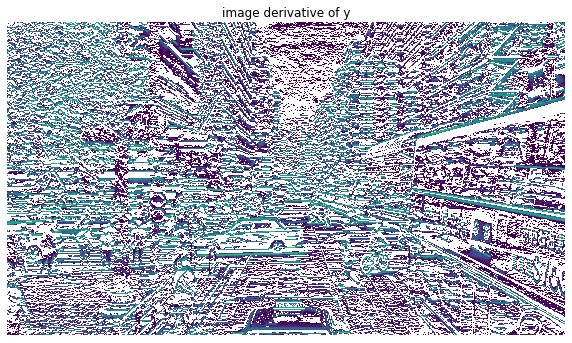

In [14]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

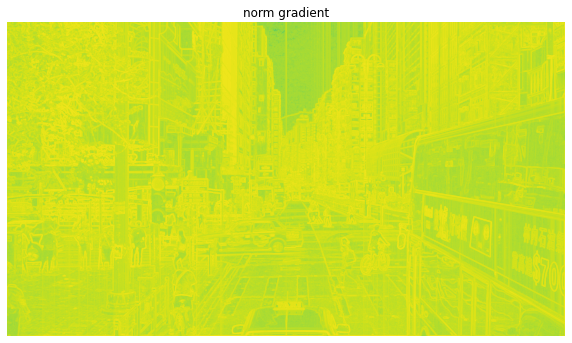

In [15]:
plot_norm_gradient(norm_gradient)